In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

random_state = 1
# All the same preprocessing steps are performed below: 

In [2]:
skincare = pd.read_csv('skincare_prepared.csv', sep=",")
skincare

,product_name,brand,product_url,product_type,ingredients,price,contents
0,Acorelle Pure Harvest Body Perfume - 100ml,Acorelle,https://www.lookfantastic.com/acorelle-pure-ha...,Mist,"Alcohol, Aqua, Glycerin, Fragrance, Limonene, ...",10.0,100ml
1,Aesop Parsley Seed Anti-Oxidant Eye Cream 10ml,Aesop,https://www.lookfantastic.com/aesop-parsley-se...,Eye Care,"Aloe Barbadensis Leaf Juice, Water, PEG-60 Alm...",63.0,10ml
2,Aesop Parsley Seed Anti-Oxidant Eye Serum 15ml,Aesop,https://www.lookfantastic.com/aesop-parsley-se...,Eye Care,"Aloe Babedensis Lead Juice, Water (Aqua), PEG ...",57.0,15ml
3,Aesop Amazing Face Cleanser 200ml,Aesop,https://www.lookfantastic.com/aesop-amazing-fa...,Cleanser,"Water, Cocamidopropyl Belaine, Sea Salt, Glyce...",35.0,200ml
4,Aesop Animal Body Wash 500ml,Aesop,https://www.lookfantastic.com/aesop-animal-bod...,Body Wash,"Water (Aqua), Sodium Laureth Sulfate, Propylen...",27.0,500ml
...,...,...,...,...,...,...,...
1130,Zelens Triple Action Advanced Eye Cream,Zelens,https://www.lookfantastic.com/zelens-triple-ac...,Eye Care,"Aqua (Water), Dimethicone, Cyclopentasiloxane,...",80.0,15ml
1131,Zelens Youth Concentrate Supreme Age-Defying S...,Zelens,https://www.lookfantastic.com/zelens-youth-con...,Serum,"Water (Aqua), Caprylic/Capric Triglyceride, Hy...",160.0,30ml
1132,Zelens Z Hyaluron Hyaluronic Acid Complex Seru...,Zelens,https://www.lookfantastic.com/zelens-z-hyaluro...,Serum,"Aqua (Water), Glycerin, Propanediol, Hydrolyze...",55.0,30ml
1133,Zelens PROVITAMIN D Fortifying Facial Mist 50ml,Zelens,https://www.lookfantastic.com/zelens-provitami...,Mist,"Aqua (Water), Propanediol, Glycerin, Polyglyce...",55.0,50ml


In [3]:
skincare['contents'] = skincare['contents'].str.replace('ml', '')
skincare['contents'] = skincare['contents'].str.replace('g', '')
skincare
# Big assumption - treat ml and g as the same measurement because the viscosity for each product is unknown

,product_name,brand,product_url,product_type,ingredients,price,contents
0,Acorelle Pure Harvest Body Perfume - 100ml,Acorelle,https://www.lookfantastic.com/acorelle-pure-ha...,Mist,"Alcohol, Aqua, Glycerin, Fragrance, Limonene, ...",10.0,100
1,Aesop Parsley Seed Anti-Oxidant Eye Cream 10ml,Aesop,https://www.lookfantastic.com/aesop-parsley-se...,Eye Care,"Aloe Barbadensis Leaf Juice, Water, PEG-60 Alm...",63.0,10
2,Aesop Parsley Seed Anti-Oxidant Eye Serum 15ml,Aesop,https://www.lookfantastic.com/aesop-parsley-se...,Eye Care,"Aloe Babedensis Lead Juice, Water (Aqua), PEG ...",57.0,15
3,Aesop Amazing Face Cleanser 200ml,Aesop,https://www.lookfantastic.com/aesop-amazing-fa...,Cleanser,"Water, Cocamidopropyl Belaine, Sea Salt, Glyce...",35.0,200
4,Aesop Animal Body Wash 500ml,Aesop,https://www.lookfantastic.com/aesop-animal-bod...,Body Wash,"Water (Aqua), Sodium Laureth Sulfate, Propylen...",27.0,500
...,...,...,...,...,...,...,...
1130,Zelens Triple Action Advanced Eye Cream,Zelens,https://www.lookfantastic.com/zelens-triple-ac...,Eye Care,"Aqua (Water), Dimethicone, Cyclopentasiloxane,...",80.0,15
1131,Zelens Youth Concentrate Supreme Age-Defying S...,Zelens,https://www.lookfantastic.com/zelens-youth-con...,Serum,"Water (Aqua), Caprylic/Capric Triglyceride, Hy...",160.0,30
1132,Zelens Z Hyaluron Hyaluronic Acid Complex Seru...,Zelens,https://www.lookfantastic.com/zelens-z-hyaluro...,Serum,"Aqua (Water), Glycerin, Propanediol, Hydrolyze...",55.0,30
1133,Zelens PROVITAMIN D Fortifying Facial Mist 50ml,Zelens,https://www.lookfantastic.com/zelens-provitami...,Mist,"Aqua (Water), Propanediol, Glycerin, Polyglyce...",55.0,50


In [4]:
skincare['contents'] = skincare['contents'].astype(float)
skincare['price'] = skincare['price'].astype(float)
skincare

,product_name,brand,product_url,product_type,ingredients,price,contents
0,Acorelle Pure Harvest Body Perfume - 100ml,Acorelle,https://www.lookfantastic.com/acorelle-pure-ha...,Mist,"Alcohol, Aqua, Glycerin, Fragrance, Limonene, ...",10.0,100.0
1,Aesop Parsley Seed Anti-Oxidant Eye Cream 10ml,Aesop,https://www.lookfantastic.com/aesop-parsley-se...,Eye Care,"Aloe Barbadensis Leaf Juice, Water, PEG-60 Alm...",63.0,10.0
2,Aesop Parsley Seed Anti-Oxidant Eye Serum 15ml,Aesop,https://www.lookfantastic.com/aesop-parsley-se...,Eye Care,"Aloe Babedensis Lead Juice, Water (Aqua), PEG ...",57.0,15.0
3,Aesop Amazing Face Cleanser 200ml,Aesop,https://www.lookfantastic.com/aesop-amazing-fa...,Cleanser,"Water, Cocamidopropyl Belaine, Sea Salt, Glyce...",35.0,200.0
4,Aesop Animal Body Wash 500ml,Aesop,https://www.lookfantastic.com/aesop-animal-bod...,Body Wash,"Water (Aqua), Sodium Laureth Sulfate, Propylen...",27.0,500.0
...,...,...,...,...,...,...,...
1130,Zelens Triple Action Advanced Eye Cream,Zelens,https://www.lookfantastic.com/zelens-triple-ac...,Eye Care,"Aqua (Water), Dimethicone, Cyclopentasiloxane,...",80.0,15.0
1131,Zelens Youth Concentrate Supreme Age-Defying S...,Zelens,https://www.lookfantastic.com/zelens-youth-con...,Serum,"Water (Aqua), Caprylic/Capric Triglyceride, Hy...",160.0,30.0
1132,Zelens Z Hyaluron Hyaluronic Acid Complex Seru...,Zelens,https://www.lookfantastic.com/zelens-z-hyaluro...,Serum,"Aqua (Water), Glycerin, Propanediol, Hydrolyze...",55.0,30.0
1133,Zelens PROVITAMIN D Fortifying Facial Mist 50ml,Zelens,https://www.lookfantastic.com/zelens-provitami...,Mist,"Aqua (Water), Propanediol, Glycerin, Polyglyce...",55.0,50.0


In [5]:
skincare['product_type'].unique() 

array(['Mist', 'Eye Care', 'Cleanser', 'Body Wash', 'Mask', 'Bath Salts',
       'Peel', 'Toner', 'Balm', 'Moisturiser', 'Bath Oil', 'Oil', 'Serum',
       'Exfoliator'], dtype=object)

In [6]:
print(skincare['price'].describe())

count    1135.000000
mean       23.963419
std        21.713618
min         1.950000
25%         9.950000
50%        18.900000
75%        31.250000
max       230.000000
Name: price, dtype: float64


In [7]:
skincare['price'] = skincare["price"].apply(lambda x: 1 if x > 18.90 else 0)
# convert the price to 1 for 'expensive' if over the 50 percentile, and to 0 for 'cheap' if under the 50 percentile
skincare['price'].value_counts()

0    568
1    567
Name: price, dtype: int64

In [8]:
y = np.array(skincare['price'])
y.shape
# prepare labels
y

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [9]:
def tokenizer(x) -> list: 
    x = x.replace('(', '')
    x = x.replace(')', '')
    x = x.replace("\xa0", " ")
    x = x.replace(".", ",")
    x = x.replace(" & ", ", ")
    x = re.split(', ', x)
#     for item in x: 
#         if (item == "aqua") or (item == "water aqua") or (item == "aqua water") or (item == "water/aqua") or (item == "aqua / water") or (item = "aqua/water/eau") or (item == "water\\aqua\\eau ") or (item == "water aqua/eau") or (item == "aqua/water purified water"):
#             item = "water"
    
    return x

In [10]:
tokenizer("(Hello.\xa0 & there!")

['Hello', '', 'there!']

In [11]:
ohe = OneHotEncoder()
vect = CountVectorizer(tokenizer=lambda x: tokenizer(x))
scaler = StandardScaler()

In [12]:
X = skincare[['brand', 'contents', 'product_type', 'ingredients']]
X

,brand,contents,product_type,ingredients
0,Acorelle,100.0,Mist,"Alcohol, Aqua, Glycerin, Fragrance, Limonene, ..."
1,Aesop,10.0,Eye Care,"Aloe Barbadensis Leaf Juice, Water, PEG-60 Alm..."
2,Aesop,15.0,Eye Care,"Aloe Babedensis Lead Juice, Water (Aqua), PEG ..."
3,Aesop,200.0,Cleanser,"Water, Cocamidopropyl Belaine, Sea Salt, Glyce..."
4,Aesop,500.0,Body Wash,"Water (Aqua), Sodium Laureth Sulfate, Propylen..."
...,...,...,...,...
1130,Zelens,15.0,Eye Care,"Aqua (Water), Dimethicone, Cyclopentasiloxane,..."
1131,Zelens,30.0,Serum,"Water (Aqua), Caprylic/Capric Triglyceride, Hy..."
1132,Zelens,30.0,Serum,"Aqua (Water), Glycerin, Propanediol, Hydrolyze..."
1133,Zelens,50.0,Mist,"Aqua (Water), Propanediol, Glycerin, Polyglyce..."


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.4, random_state=random_state, stratify=y)

# w/ BRAND - BINARY - PERCEPTRON

In [14]:
ct = make_column_transformer(
    (ohe, ["product_type"]),
    (vect, "ingredients"),
    (vect, 'brand'),
    (scaler, ["contents"]), 
    remainder="passthrough")
# define a column transformer, this time with all predictors including brand

In [15]:
from sklearn.linear_model import Perceptron
perc = Perceptron()
pr_pipe = make_pipeline(ct, perc)
# prepare the pipeline with the column transformer

pr_pipe.fit(X_train, y_train)
# fit the pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['product_type']),
                                                 ('countvectorizer-1',
                                                  CountVectorizer(tokenizer=<function <lambda> at 0x000002A0C430C700>),
                                                  'ingredients'),
                                                 ('countvectorizer-2',
                                                  CountVectorizer(tokenizer=<function <lambda> at 0x000002A0C430C700>),
                                                  'brand'),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['con

In [16]:
perc_predictions = pr_pipe.predict(X_test)
# get perceptron predictions

In [17]:
accuracy_score(y_test, perc_predictions)
# get initial accuracy score with no optimization

0.7665198237885462

In [18]:
scores = cross_val_score(estimator=pr_pipe, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)

[0.84057971 0.69117647 0.67647059 0.80882353 0.77941176 0.79411765
 0.77941176 0.79411765 0.72058824 0.69117647]


In [19]:
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))
# report cross-validation accuracy scores

Accuracy = 0.75758738 +/- 0.05468463


# w/ BRAND - BINARY - LOGISTIC REGRESSION

In [20]:
ct = make_column_transformer(
    (ohe, ["product_type"]),
    (vect, "ingredients"),
    (vect, "brand"),
    (scaler, ["contents"]), 
    remainder="passthrough")
# reminding myself what is in the column transformer

In [21]:
lr = LogisticRegression(random_state=random_state, max_iter = 10000)
lr_pipe = make_pipeline(ct, lr)
# prepare pipeline with logistic regression and the transformers

In [22]:
lr_pipe.fit(X_train, y_train)
# fit the pipeline
lr_predictions = lr_pipe.predict(X_test)
# get the predictions

In [23]:
accuracy_score(y_test, lr_predictions)
# get initial accuracy score with no optimization

0.7775330396475771

In [24]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
tols = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
Cs = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
# define a parameter grid optimizing the solver, tolerance, and regularization
param_grid = {'logisticregression__C': Cs, 'logisticregression__solver':solvers, 'logisticregression__tol':tols}

lr_pipe = make_pipeline(ct, lr)
# remake the pipeline

lr_gs = RandomizedSearchCV(estimator=lr_pipe, param_distributions=param_grid, random_state=random_state, scoring='accuracy', cv=10, refit=True)
# get best hyperparameters with randomized grid search
lr_gs = lr_gs.fit(X_train, y_train)
lr_gs.best_params_

{'logisticregression__tol': 1e-05,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__C': 10}

In [25]:
best_lr = lr_gs.best_estimator_

best_lr.score(X_test, y_test)
# get accuracy score of best estimator

0.7577092511013216

In [26]:
scores = cross_val_score(estimator=best_lr, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)

[0.84057971 0.75       0.70588235 0.79411765 0.77941176 0.76470588
 0.82352941 0.77941176 0.70588235 0.76470588]


In [27]:
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))
# report cross validation accuracy scores

Accuracy = 0.77082268 +/- 0.04156579


# w/BRAND - BINARY - DECISION TREE

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=random_state, criterion='entropy')
# instantiate a decision tree classifier
ct = make_column_transformer(
    (ohe, ["product_type"]),
    (vect, "ingredients"),
    (vect, "brand"), # scaling not necessary
    remainder="passthrough")

dt_pipe = make_pipeline(ct, dt)

dt_pipe.fit(X_train, y_train)
dt_predictions = dt_pipe.predict(X_test)
accuracy_score(y_test, dt_predictions)
# get initial accuracy score with no optimization

0.7136563876651982

In [29]:
print(classification_report(y_test, dt_predictions))

              precision    recall  f1-score   support

           0       0.72      0.69      0.71       227
           1       0.70      0.74      0.72       227

    accuracy                           0.71       454
   macro avg       0.71      0.71      0.71       454
weighted avg       0.71      0.71      0.71       454



In [30]:
confusion_matrix(y_test, dt_predictions)

array([[157,  70],
       [ 60, 167]], dtype=int64)

In [31]:
criterions = ['gini', 'entropy']
max_depths = [None, 10, 100, 1000, 10000]
param_grid = {'decisiontreeclassifier__min_samples_leaf': np.arange(1,50), 
              'decisiontreeclassifier__max_depth': max_depths, 
              'decisiontreeclassifier__criterion':criterions}
dt = DecisionTreeClassifier(random_state=random_state, criterion='entropy')
dt_pipe = make_pipeline(ct, dt)
dt_gs = RandomizedSearchCV(estimator=dt_pipe, param_distributions=param_grid, random_state=random_state, scoring='accuracy', cv=10, refit=True)
dt_gs = dt_gs.fit(X_train, y_train)
print(dt_gs.best_params_)
best_dt = dt_gs.best_estimator_   # refitting done automatically
print(best_dt.score(X_test, y_test))

{'decisiontreeclassifier__min_samples_leaf': 31, 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__criterion': 'entropy'}
0.7070484581497798


In [32]:
scores = cross_val_score(estimator=best_dt, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)

[0.75362319 0.67647059 0.72058824 0.76470588 0.69117647 0.69117647
 0.80882353 0.76470588 0.64705882 0.61764706]


In [33]:
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))

Accuracy = 0.71359761 +/- 0.05653384


# w/BRAND - BINARY - KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors=5) #instantiate a KNN classifier
ct = make_column_transformer(
    (ohe, ["product_type"]),
    (vect, "ingredients"),
    (vect, "brand"),
    (scaler, ["contents"]), 
    remainder="passthrough")
knn_pipe = make_pipeline(ct, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['product_type']),
                                                 ('countvectorizer-1',
                                                  CountVectorizer(tokenizer=<function <lambda> at 0x000002A0C430C700>),
                                                  'ingredients'),
                                                 ('countvectorizer-2',
                                                  CountVectorizer(tokenizer=<function <lambda> at 0x000002A0C430C700>),
                                                  'brand'),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['con

In [35]:
knn_predictions = knn_pipe.predict(X_test)
accuracy_score(y_test, knn_predictions)
# get initial accuracy score with no optimization

0.6674008810572687

In [36]:
knn_pipe = make_pipeline(ct, knn)
param_grid = {'kneighborsclassifier__n_neighbors': np.arange(1,50), 
              'kneighborsclassifier__weights':['uniform', 'distance']}

knn_gs = RandomizedSearchCV(estimator=knn_pipe, param_distributions=param_grid, random_state=random_state, scoring='accuracy', cv=10, refit=True)
knn_gs = knn_gs.fit(X_train, y_train)
print(knn_gs.best_params_)
best_knn = knn_gs.best_estimator_   # refitting done automatically
print(best_knn.score(X_test, y_test))

{'kneighborsclassifier__weights': 'distance', 'kneighborsclassifier__n_neighbors': 9}
0.6365638766519823


In [37]:
scores = cross_val_score(estimator=best_knn, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)

[0.72463768 0.67647059 0.60294118 0.60294118 0.67647059 0.72058824
 0.58823529 0.52941176 0.55882353 0.70588235]


In [38]:
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))

Accuracy = 0.63864024 +/- 0.06699692


# w/ BRAND - BINARY - SVM

In [39]:
from sklearn.svm import SVC

In [40]:
svm = SVC(kernel='linear', random_state = random_state) #instantiate a SVC classifier

In [41]:
svm_pipe = make_pipeline(ct, svm)
svm_pipe.fit(X_train, y_train)
# fit pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['product_type']),
                                                 ('countvectorizer-1',
                                                  CountVectorizer(tokenizer=<function <lambda> at 0x000002A0C430C700>),
                                                  'ingredients'),
                                                 ('countvectorizer-2',
                                                  CountVectorizer(tokenizer=<function <lambda> at 0x000002A0C430C700>),
                                                  'brand'),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['con

In [42]:
svm_predictions = svm_pipe.predict(X_test)
accuracy_score(y_test, svm_predictions)
# get initial accuracy score with no optimization

0.7180616740088106

In [43]:
svm = SVC(kernel='linear', random_state = random_state)
ct = make_column_transformer(
    (ohe, ["product_type"]),
    (vect, "ingredients"),
    (vect, "brand"),
    (scaler, ["contents"]), 
    remainder="passthrough")
svm_pipe = make_pipeline(ct, svm)

param_grid = [{'svc__C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
               'svc__kernel': ['linear']},
              {'svc__C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
               'svc__gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
               'svc__kernel': ['rbf']}]
svm_gs = RandomizedSearchCV(estimator=svm_pipe, random_state = random_state, param_distributions=param_grid, scoring='accuracy', cv=10, refit=True)
svm_gs = svm_gs.fit(X_train, y_train)
print(svm_gs.best_params_)
best_svm = svm_gs.best_estimator_   # refitting done automatically
print(best_svm.score(X_test, y_test))

{'svc__kernel': 'rbf', 'svc__gamma': 0.0001, 'svc__C': 100}
0.7422907488986784


In [44]:
scores = cross_val_score(estimator=best_svm, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)

[0.82608696 0.70588235 0.67647059 0.72058824 0.77941176 0.73529412
 0.86764706 0.75       0.76470588 0.82352941]


In [45]:
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))

Accuracy = 0.76496164 +/- 0.05684514


# w/ BRAND - BINARY - VOTING CLASSIFIER

In [46]:
from sklearn.ensemble import VotingClassifier

lr = LogisticRegression(tol=0.1, solver='saga', C=3, random_state=random_state)
perc = Perceptron()
svm = SVC(kernel='linear', C=0.1, random_state=random_state)
# fit the voting classifier with the best-performing algorithms

classifiers = [("Logistic Regression", lr),
              ("Perceptron", perc),
              ("Support Vector Classifier", svm)]
vc = VotingClassifier(estimators = classifiers)

vc_pipe = make_pipeline(ct, vc)
# prepare the pipeline

In [47]:
vc_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['product_type']),
                                                 ('countvectorizer-1',
                                                  CountVectorizer(tokenizer=<function <lambda> at 0x000002A0C430C700>),
                                                  'ingredients'),
                                                 ('countvectorizer-2',
                                                  CountVectorizer(tokenizer=<function <lambda> at 0x000002A0C430C700>),
                                                  'brand'),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['con

In [48]:
vc_predictions = vc_pipe.predict(X_test)
accuracy_score(y_test, vc_predictions)
# get initial accuracy score with no optimization

0.7841409691629956

In [49]:
scores = cross_val_score(estimator=vc_pipe, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)

[0.86956522 0.70588235 0.69117647 0.79411765 0.79411765 0.73529412
 0.86764706 0.79411765 0.80882353 0.73529412]


In [50]:
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))
# pretty high accuracy comopared to the others

Accuracy = 0.77960358 +/- 0.05874637


# w/ BRAND - BINARY - BAGGING CLASSIFIER

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

dt = DecisionTreeClassifier(min_samples_leaf=31,
                            max_depth=10, 
                            criterion='entropy',
                            random_state = random_state)
# use decision trees again for the bagging classifier
bc = BaggingClassifier(base_estimator = dt, random_state=random_state, n_estimators = 300, n_jobs = -1)
# instantiate a bagging classifier
# remind myself of what is in the column transformer
ct = make_column_transformer(
    (ohe, ["product_type"]),
    (vect, "ingredients"),
    (vect, "brand"),
    remainder="passthrough")

bc_pipe = make_pipeline(ct, bc)
X_train # inspect Xtrain again

,brand,contents,product_type,ingredients
145,Bondi Sands,250.0,Mist,"Butane, Water, Alcohol, Isobutane, Propane, Di..."
1099,Weleda,150.0,Body Wash,"Water (Aqua), Sesamum Indicum (Sesame) Seed Oi..."
168,Bulldog,150.0,Cleanser,"Aqua (Water), Cocamidopropyl betaine, Coco-glu..."
141,Bobbi Brown,30.0,Serum,"Water\Aqua\Eau, Squalane, Glycerin, Butylene G..."
775,Natio,100.0,Exfoliator,"Water (Aqua), Ammonium Lauryl Sulfate, Cocamid..."
...,...,...,...,...
591,La Roche-Posay,15.0,Eye Care,"Aqua / Water, Glycerin, Carbomer, Glycinesoja ..."
723,Mauli,460.0,Bath Salts,"Himalayan Salts, Geranium, Sweet Blood Orange,..."
791,Neal's Yard Remedies,200.0,Toner,"Aqua (Water), Alcohol Denat., Aloe Barbadensis..."
208,CeraVe,14.0,Eye Care,"Purified Water, Niacinamide, Cetyl Alcohol, Ca..."


In [52]:
bc_pipe.fit(X_train, y_train) # fit pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['product_type']),
                                                 ('countvectorizer-1',
                                                  CountVectorizer(tokenizer=<function <lambda> at 0x000002A0C430C700>),
                                                  'ingredients'),
                                                 ('countvectorizer-2',
                                                  CountVectorizer(tokenizer=<function <lambda> at 0x000002A0C430C700>),
                                                  'brand')])),
                ('baggingclassifier',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        

In [53]:
bc_predictions = bc_pipe.predict(X_test)

In [54]:
accuracy_score(y_test, bc_predictions)
# get initial accuracy score with no optimization

0.6960352422907489

In [55]:
accs = []
# opitimize the number of estimators
n_estimators_range = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
for n_estimators in n_estimators_range: 
    bc = BaggingClassifier(base_estimator = dt, random_state=random_state, n_estimators = n_estimators, n_jobs = -1)
    ct = make_column_transformer(
    (ohe, ["product_type"]),
    (vect, 'brand'),
    (vect, "ingredients"), 
    remainder="passthrough")
    bc_pipe = make_pipeline(ct, bc)
    bc_pipe.fit(X_train, y_train)
    bc_pred = bc_pipe.predict(X_test)
    acc = accuracy_score(y_test, bc_pred)
    accs.append(acc)
    print(n_estimators, "Done with this number of estimators")

100 Done with this number of estimators
200 Done with this number of estimators
300 Done with this number of estimators
400 Done with this number of estimators
500 Done with this number of estimators
600 Done with this number of estimators
700 Done with this number of estimators
800 Done with this number of estimators
900 Done with this number of estimators
1000 Done with this number of estimators


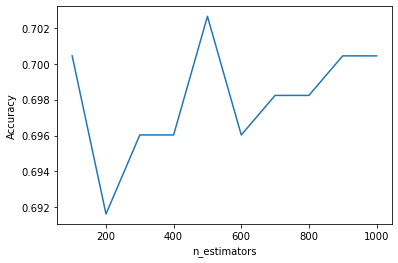

In [56]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(n_estimators_range, accs)
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.show()

In [57]:
bc = BaggingClassifier(base_estimator = dt, random_state=random_state, n_estimators = 600, n_jobs = -1)
# refit with best n_estimators
ct = make_column_transformer(
    (ohe, ["product_type"]),
    (vect, "ingredients"),
    (vect, 'brand'),
    remainder="passthrough")
bc_pipe = make_pipeline(ct, bc)
bc_pipe.fit(X_train, y_train)
bc_pred = bc_pipe.predict(X_test)
print(accuracy_score(y_test, bc_pred))
scores = cross_val_score(estimator=bc_pipe, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))

0.6960352422907489
[0.76811594 0.64705882 0.69117647 0.77941176 0.66176471 0.70588235
 0.82352941 0.72058824 0.69117647 0.63235294]
Accuracy = 0.71210571 +/- 0.05847654


# w/BRAND - BINARY - RANDOM FORESTS

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)

ct = make_column_transformer(
    (ohe, ["product_type"]),
    (vect, "ingredients"),
    (vect, "brand"),
    remainder="passthrough")

rf_pipe = make_pipeline(ct, rf)

In [60]:
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['product_type']),
                                                 ('countvectorizer-1',
                                                  CountVectorizer(tokenizer=<function <lambda> at 0x000002A0C430C700>),
                                                  'ingredients'),
                                                 ('countvectorizer-2',
                                                  CountVectorizer(tokenizer=<function <lambda> at 0x000002A0C430C700>),
                                                  'brand')])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=1000, random_state=1))])

In [61]:
rf_pred = rf_pipe.predict(X_test)

In [62]:
accuracy_score(y_test, rf_pred)
# get initial accuracy score with no optimization

0.7599118942731278

In [63]:
criterions = ['gini', 'entropy']
max_depths = [None, 10, 100, 1000, 10000]
param_grid = {'randomforestclassifier__min_samples_leaf': np.arange(1,50), 
              'randomforestclassifier__max_depth': max_depths, 
              'randomforestclassifier__criterion':criterions}
rf = RandomForestClassifier(n_estimators = 1000, random_state = random_state)
rf_pipe = make_pipeline(ct, rf)

rf_gs = RandomizedSearchCV(estimator=rf_pipe, param_distributions=param_grid, random_state=random_state, scoring='accuracy', cv=10, refit=True)
rf_gs = rf_gs.fit(X_train, y_train)
print(rf_gs.best_params_)
best_rf = rf_gs.best_estimator_   # refitting done automatically
print(best_rf.score(X_test, y_test))

{'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__max_depth': 10000, 'randomforestclassifier__criterion': 'gini'}
0.7555066079295154


In [64]:
scores = cross_val_score(estimator=best_rf, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))

[0.82608696 0.72058824 0.67647059 0.86764706 0.77941176 0.80882353
 0.86764706 0.77941176 0.77941176 0.75      ]
Accuracy = 0.78554987 +/- 0.05758467


# w/ BRAND - BINARY - PERCEPTRON (NO INGREDIENTS, NO CONTENTS)

In [65]:
X = skincare[['brand', 'product_type']]
X

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.4, random_state=random_state, stratify=y)
# prepare the train and test data again but now with only brand and product type

In [66]:
ct = make_column_transformer(
    (ohe, ["product_type"]),
    (vect, 'brand'),  # only include transformers for brand and product type because we are only using that now
    remainder="passthrough")

In [67]:
from sklearn.linear_model import Perceptron
perc = Perceptron()
pr_pipe = make_pipeline(ct, perc)

pr_pipe.fit(X_train, y_train)
# fit the perceptron pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['product_type']),
                                                 ('countvectorizer',
                                                  CountVectorizer(tokenizer=<function <lambda> at 0x000002A0C430C700>),
                                                  'brand')])),
                ('perceptron', Perceptron())])

In [68]:
perc_predictions = pr_pipe.predict(X_test)

In [69]:
accuracy_score(y_test, perc_predictions)
# get initial accuracy score with no optimization

0.8193832599118943

In [70]:
scores = cross_val_score(estimator=pr_pipe, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))

[0.92753623 0.77941176 0.85294118 0.85294118 0.80882353 0.75
 0.82352941 0.73529412 0.63235294 0.79411765]
Accuracy = 0.79569480 +/- 0.07587360


# w/ BRAND - BINARY - LOGISTIC REGRESSION (NO INGREDIENTS, NO CONTENTS)

In [71]:
ct = make_column_transformer(
    (ohe, ["product_type"]),
    (vect, "brand"), 
    remainder="passthrough")
# reminding myself of what is in the pipeline

In [72]:
lr = LogisticRegression(random_state=random_state, max_iter = 10000)
lr_pipe = make_pipeline(ct, lr)
# make the pipeline

In [73]:
lr_pipe.fit(X_train, y_train) # fit pipeline
lr_predictions = lr_pipe.predict(X_test)
# get initial accuracy score with no optimization

In [74]:
accuracy_score(y_test, lr_predictions)

0.8303964757709251

In [75]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
tols = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
Cs = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
param_grid = {'logisticregression__C': Cs, 'logisticregression__solver':solvers, 'logisticregression__tol':tols}
lr_pipe = make_pipeline(ct, lr)
lr_gs = RandomizedSearchCV(estimator=lr_pipe, param_distributions=param_grid, random_state=random_state, scoring='accuracy', cv=10, refit=True)
lr_gs = lr_gs.fit(X_train, y_train)
lr_gs.best_params_
# inspec the best parameters

{'logisticregression__tol': 1e-05,
 'logisticregression__solver': 'saga',
 'logisticregression__C': 10}

In [76]:
best_lr = lr_gs.best_estimator_   # refitting done automatically
best_lr.score(X_test, y_test)

0.8414096916299559

In [77]:
scores = cross_val_score(estimator=best_lr, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)

[0.86956522 0.80882353 0.86764706 0.85294118 0.83823529 0.79411765
 0.85294118 0.79411765 0.76470588 0.88235294]


In [78]:
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))
# report the cross validation scores

Accuracy = 0.83254476 +/- 0.03750473


# w/ BRAND - BINARY - DECISION TREE (NO INGREDIENTS, NO CONTENTS)

In [79]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=random_state, criterion='entropy')
# instantiate a decision tree classifier
ct = make_column_transformer(
    (ohe, ["product_type"]),
    (vect, "brand"),
    remainder="passthrough")

dt_pipe = make_pipeline(ct, dt)
# pepare the pipeline
dt_pipe.fit(X_train, y_train)
dt_predictions = dt_pipe.predict(X_test)
accuracy_score(y_test, dt_predictions)
# get initial accuracy score with no optimization

0.8215859030837004

In [80]:
criterions = ['gini', 'entropy']
max_depths = [None, 10, 100, 1000, 10000]
param_grid = {'decisiontreeclassifier__min_samples_leaf': np.arange(1,50), 
              'decisiontreeclassifier__max_depth': max_depths, 
              'decisiontreeclassifier__criterion':criterions}

dt_gs = RandomizedSearchCV(estimator=dt_pipe, param_distributions=param_grid, random_state=random_state, scoring='accuracy', cv=10, refit=True)
dt_gs = dt_gs.fit(X_train, y_train)
print(dt_gs.best_params_)
best_dt = dt_gs.best_estimator_   # refitting done automatically
print(best_dt.score(X_test, y_test))

{'decisiontreeclassifier__min_samples_leaf': 2, 'decisiontreeclassifier__max_depth': 10000, 'decisiontreeclassifier__criterion': 'gini'}
0.7995594713656388


In [81]:
scores = cross_val_score(estimator=best_dt, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)

[0.76811594 0.80882353 0.76470588 0.80882353 0.79411765 0.66176471
 0.75       0.72058824 0.67647059 0.75      ]


In [82]:
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))

Accuracy = 0.75034101 +/- 0.04844292


# w/ BRAND - BINARY - SVM (NO INGREDIENTS, NO CONTENTS)

In [83]:
svm = SVC(kernel='rbf', random_state = random_state)
# instantiate an SVC classifier

svm_pipe = make_pipeline(ct, svm)
svm_pipe.fit(X_train, y_train)
# fit pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['product_type']),
                                                 ('countvectorizer',
                                                  CountVectorizer(tokenizer=<function <lambda> at 0x000002A0C430C700>),
                                                  'brand')])),
                ('svc', SVC(random_state=1))])

In [84]:
svm_predictions = svm_pipe.predict(X_test)
accuracy_score(y_test, svm_predictions)
# get initial accuracy score with no optimization

0.8612334801762115

In [85]:
svm = SVC(kernel='linear', random_state = random_state) #instantiate a SVC classifier again
# remind myself of what is in the column transformer
ct = make_column_transformer(
    (ohe, ["product_type"]),
    (vect, "brand"), 
    remainder="passthrough")

svm_pipe = make_pipeline(ct, svm)

param_grid = [{'svc__C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
               'svc__kernel': ['linear']},
              {'svc__C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
               'svc__gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
               'svc__kernel': ['rbf']}]
# define hyperparameter grid to optimize the classifier
svm_gs = RandomizedSearchCV(estimator=svm_pipe, random_state = random_state, param_distributions=param_grid, scoring='accuracy', cv=10, refit=True)
svm_gs = svm_gs.fit(X_train, y_train)
print(svm_gs.best_params_)
best_svm = svm_gs.best_estimator_   # refitting done automatically
print(best_svm.score(X_test, y_test))

{'svc__kernel': 'rbf', 'svc__gamma': 0.0001, 'svc__C': 10000}
0.8458149779735683


In [86]:
scores = cross_val_score(estimator=best_svm, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)


[0.86956522 0.76470588 0.85294118 0.85294118 0.83823529 0.79411765
 0.86764706 0.77941176 0.70588235 0.82352941]


In [87]:
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))

Accuracy = 0.81489770 +/- 0.05037799


# w/ BRAND - BINARY - KNN (NO INGREDIENTS, NO CONTENTS)

In [88]:
knn = KNN()
# instantiate KNN classifier

In [111]:
ct = make_column_transformer(
    (ohe, ["product_type"]),
    (vect, "brand"), 
    remainder="passthrough")
knn_pipe = make_pipeline(ct, knn)
knn_pipe.fit(X_train, y_train)
knn_predictions = knn_pipe.predict(X_test)
accuracy_score(y_test, knn_predictions)
# get initial accuracy score with no optimization

0.737885462555066

In [90]:
knn_pipe = make_pipeline(ct, knn)
param_grid = {'kneighborsclassifier__n_neighbors': np.arange(1,50), 
              'kneighborsclassifier__weights':['uniform', 'distance']}

knn_gs = RandomizedSearchCV(estimator=knn_pipe, param_distributions=param_grid, random_state=random_state, scoring='accuracy', cv=10, refit=True)
knn_gs = knn_gs.fit(X_train, y_train)
print(knn_gs.best_params_)
best_knn = knn_gs.best_estimator_   # refitting done automatically
print(best_knn.score(X_test, y_test))
# inspect best hyperparameters and test accuracy

{'kneighborsclassifier__weights': 'distance', 'kneighborsclassifier__n_neighbors': 39}
0.8370044052863436


In [91]:
scores = cross_val_score(estimator=best_knn, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)


[0.82608696 0.83823529 0.85294118 0.82352941 0.83823529 0.66176471
 0.73529412 0.76470588 0.76470588 0.75      ]


In [92]:
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))
# report cross validation scores

Accuracy = 0.78554987 +/- 0.05758467


# w/ BRAND - BINARY - VOTING CLASSIFIER (NO INGREDIENTS, NO CONTENTS)

In [93]:
ct = make_column_transformer(
    (ohe, ["product_type"]),
    (vect, "brand"), 
    remainder="passthrough")
# use the best models from the experiments so far in voting classifier

lr = LogisticRegression(tol=1e-05, solver='saga', C=10, random_state=random_state)
perc = Perceptron()
svm = SVC(kernel='rbf', gamma=0.0001, C=10000, random_state = random_state)

classifiers = [("Logistic Regression", lr),
              ("Perceptron", perc),
              ("Support Vector Classifier", svm)]
vc = VotingClassifier(estimators = classifiers)

vc_pipe = make_pipeline(ct, vc)

In [94]:
vc_pipe.fit(X_train, y_train)

C:\Users\Dora\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['product_type']),
                                                 ('countvectorizer',
                                                  CountVectorizer(tokenizer=<function <lambda> at 0x000002A0C430C700>),
                                                  'brand')])),
                ('votingclassifier',
                 VotingClassifier(estimators=[('Logistic Regression',
                                               LogisticRegression(C=10,
                                                                  random_state=1,
                                                                  solver='saga',
                                                                  tol=1e-05)),
                          

In [95]:
vc_pred = vc_pipe.predict(X_test)
accuracy_score(y_test, vc_pred)
# get initial accuracy score with no optimization

0.8348017621145375

In [96]:
scores = cross_val_score(estimator=vc_pipe, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)

[0.88405797 0.79411765 0.86764706 0.88235294 0.83823529 0.79411765
 0.85294118 0.76470588 0.72058824 0.86764706]


In [97]:
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))
# report cross validation scores

Accuracy = 0.82664109 +/- 0.05271464


# w/ BRAND - BINARY - BAGGING CLASSIFIER (NO INGREDIENTS, NO CONTENTS)

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

dt = DecisionTreeClassifier(random_state = random_state)
# instantiate decision tree and bagging classifier
bc = BaggingClassifier(base_estimator = dt, random_state=random_state, n_estimators = 300, n_jobs = -1)

ct = make_column_transformer(
    (ohe, ["product_type"]),
    (vect, "brand"),
    remainder="passthrough")

bc_pipe = make_pipeline(ct, bc)

In [99]:
bc_pipe.fit(X_train, y_train)
# fit pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['product_type']),
                                                 ('countvectorizer',
                                                  CountVectorizer(tokenizer=<function <lambda> at 0x000002A0C430C700>),
                                                  'brand')])),
                ('baggingclassifier',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                                   n_estimators=300, n_jobs=-1,
                                   random_state=1))])

In [100]:
bc_pred = bc_pipe.predict(X_test)

In [101]:
accuracy_score(y_test, bc_pred)
# get initial accuracy score with no optimization

0.8348017621145375

In [102]:
accs = []
n_estimators_range = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
for n_estimators in n_estimators_range: 
    bc = BaggingClassifier(base_estimator = dt, random_state=random_state, n_estimators = n_estimators, n_jobs = -1)
    ct = make_column_transformer(
    (ohe, ["product_type"]),
    (vect, "brand"), 
    remainder="passthrough")
    bc_pipe = make_pipeline(ct, bc)
    bc_pipe.fit(X_train, y_train)
    bc_pred = bc_pipe.predict(X_test)
    acc = accuracy_score(y_test, bc_pred)
    accs.append(acc)
    print(n_estimators, "Done with this number of estimators")

100 Done with this number of estimators
200 Done with this number of estimators
300 Done with this number of estimators
400 Done with this number of estimators
500 Done with this number of estimators
600 Done with this number of estimators
700 Done with this number of estimators
800 Done with this number of estimators
900 Done with this number of estimators
1000 Done with this number of estimators


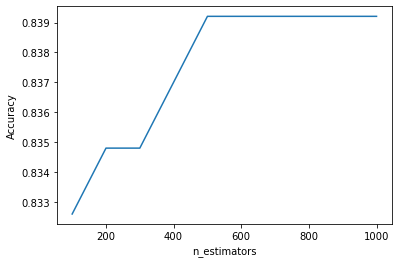

In [103]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(n_estimators_range, accs)
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.show()

In [104]:
bc = BaggingClassifier(base_estimator = dt, 
                       n_estimators = 500, 
                       n_jobs = -1, 
                       random_state=random_state)
ct = make_column_transformer(
    (ohe, ["product_type"]),
    (vect, "brand"), 
    remainder="passthrough")
bc_pipe = make_pipeline(ct, bc)
bc_pipe.fit(X_train, y_train)
bc_pred = bc_pipe.predict(X_test)
print(accuracy_score(y_test, bc_pred))
scores = cross_val_score(estimator=bc_pipe, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))
# refit with best sample size

0.8392070484581498
[0.86956522 0.76470588 0.86764706 0.82352941 0.83823529 0.70588235
 0.79411765 0.75       0.73529412 0.76470588]
Accuracy = 0.79136829 +/- 0.05362545


# w/ BRAND - BINARY  - RANDOM FORESTS (NO INGREDIENTS, NO CONTENTS)

In [105]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = random_state)

rf_pipe = make_pipeline(ct, rf)
# instantiate a random forest classifier and prepare pipeline

In [106]:
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['product_type']),
                                                 ('countvectorizer',
                                                  CountVectorizer(tokenizer=<function <lambda> at 0x000002A0C430C700>),
                                                  'brand')])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=1000, random_state=1))])

In [107]:
rf_pred = rf_pipe.predict(X_test)

In [108]:
accuracy_score(y_test, rf_pred)
# get initial accuracy score with no optimization

0.8348017621145375

In [109]:
criterions = ['gini', 'entropy']
max_depths = [None, 10, 100, 1000, 10000]
param_grid = {'randomforestclassifier__min_samples_leaf': np.arange(1,50), 
              'randomforestclassifier__max_depth': max_depths, 
              'randomforestclassifier__criterion':criterions}
rf = RandomForestClassifier(n_estimators = 1000, random_state = random_state)
# define hyperparameter grid to optimize the classifier

rf_pipe = make_pipeline(ct, rf)

rf_gs = RandomizedSearchCV(estimator=rf_pipe, param_distributions=param_grid, random_state=random_state, scoring='accuracy', cv=10, refit=True)
rf_gs = rf_gs.fit(X_train, y_train)
print(rf_gs.best_params_) # inspect best parameters
best_rf = rf_gs.best_estimator_   
print(best_rf.score(X_test, y_test))

{'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__max_depth': 10000, 'randomforestclassifier__criterion': 'gini'}
0.7775330396475771


In [110]:
scores = cross_val_score(estimator=best_rf, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))
# report cross validation scores

[0.82608696 0.77941176 0.83823529 0.73529412 0.76470588 0.70588235
 0.82352941 0.77941176 0.73529412 0.80882353]
Accuracy = 0.77966752 +/- 0.04238528
